<a href="https://colab.research.google.com/github/Arush0113/ML-Programming-Assignments/blob/main/India%20Today%20AI_ML%20Profile/India_Today_ML_assignment_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/eyewear_ml_challenge.csv', delimiter = ',')

In [3]:
df

,Unnamed: 0,product_name,product_id,parent_category,Image_Front,frame_shape
0,0,Vintage Persona C4,7641,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
1,1,Vintage Crazy-X C2 Red,7643,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
2,2,Jialedi Eyewear 1086 C8 Blue,8254,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
3,3,Jialedi Eyewear 1086 C6 Red,8255,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
4,4,Jialedi Eyewear 1086 C4 Tortoise Transperent,8256,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
...,...,...,...,...,...,...
5564,5565,Black White Full Rim Rectangle Vincent Chase O...,99444,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5565,5566,Maroon Full Rim Rectangle Vincent Chase Online...,99445,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5566,5567,Todaywear TOI Special: Black Blue Full Rim Rec...,99446,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5567,5568,Tortoise Full Rim Rectangle Vincent Chase Onli...,99447,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import requests
from tqdm.notebook import trange, tqdm
import shutil
import os
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!mkdir /content/drive/MyDrive/india_today_ml_asst

mkdir: cannot create directory ‘/content/drive/MyDrive/india_today_ml_asst’: File exists


In [6]:
# for i,row in tqdm(df.iterrows()):
#     image_url = row['Image_Front']
#     # print(image_url)
#     filename = image_url.split("/")[-1]

#     r = requests.get(image_url, stream = True)

#     if r.status_code == 200:
#         r.raw.decode_content = True
        
#         with open('/content/drive/MyDrive/india_today_ml_asst/'+filename,'wb') as f:
#             shutil.copyfileobj(r.raw, f)
            
#         print('Image sucessfully Downloaded: ',filename)
#     else:
#         print('Image Couldn\'t be retreived')

In [7]:
file_path = os.listdir('/content/drive/MyDrive/india_today_ml_asst')
print(len(file_path))

train_files, test_files = train_test_split(file_path, test_size = 0.15)

print(len(train_files))
print(len(test_files))

train_files = pd.DataFrame(train_files,columns=['filepath'])
test_files = pd.DataFrame(test_files,columns=['filepath'])

train_files.to_csv('/content/drive/MyDrive/india_today_ml_asst/train_file.csv')
test_files.to_csv('/content/drive/MyDrive/india_today_ml_asst/test_file.csv')

5536
4705
831


In [8]:
train_files

,filepath
0,M_9198_2.jpg
1,IMG_4591_1.JPG
2,IMG_9190.JPG
3,IMG_1646.jpg
4,M_9212_2.jpg
...,...
4700,arnette-4135-tortoise-black-grey-2048-81-polar...
4701,IMG_0445_3.jpg
4702,R_0765_1.jpg
4703,IMG_5178.jpg


In [13]:
def image2array(file_array):
  
 image_array = []
 for path in tqdm(file_array):
  img = cv2.imread('/content/drive/MyDrive/india_today_ml_asst/'+path)
    #  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # print(img.shape)
  try:
    img = cv2.resize(img, (224,224))
    image_array.append(np.array(img))
  except:
    continue;
 image_array = np.array(image_array)
#  image_array = image_array.reshape(image_array.shape[0], 224, 224, 3)
 image_array = image_array.astype('float32')
 image_array /= 255
 return np.array(image_array)


In [14]:
train_data = image2array(train_files.filepath)
print("Length of training dataset:",train_data.shape)
test_data = image2array(test_files.filepath)
print("Length of test dataset:",test_data.shape)

  0%|          | 0/4705 [00:00<?, ?it/s]

Length of training dataset: (4704, 224, 224, 3)


  0%|          | 0/831 [00:00<?, ?it/s]

Length of test dataset: (830, 224, 224, 3)


In [15]:
# img = cv2.imread('/content/drive/MyDrive/india_today_ml_asst/13-size_j_1350_1.jpg')

In [16]:
# plt.imshow(img)

In [18]:
train_files.filepath

0                                            M_9198_2.jpg
1                                          IMG_4591_1.JPG
2                                            IMG_9190.JPG
3                                            IMG_1646.jpg
4                                            M_9212_2.jpg
                              ...                        
4700    arnette-4135-tortoise-black-grey-2048-81-polar...
4701                                       IMG_0445_3.jpg
4702                                         R_0765_1.jpg
4703                                         IMG_5178.jpg
4704                                       DSC_0316_4.JPG
Name: filepath, Length: 4705, dtype: object

M_9198_2.jpg


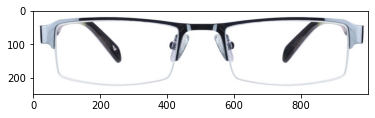

In [19]:
path = train_files.filepath[0]
print(path)
img = cv2.imread('/content/drive/MyDrive/india_today_ml_asst/'+path)
plt.imshow(img)